<a href="https://colab.research.google.com/github/bill-unitech2021/Work_Log_as_Phd/blob/main/Paper_1_EDA_for_preprocessed_sensor_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

Before the model training taking place, we do EDA one more time for the 3 data sets with 00, 30, 60 overlapping time window respectively.

## load the datasets

In [3]:
from google.colab import drive
import pandas as pd

# Mount your Google Drive
drive.mount('/content/drive')

# Specify the path to your CSV file in Google Drive
file_path_00 = '/content/drive/MyDrive/Paper_1_dataset/combined_data_prepared_00.csv'
file_path_30 = '/content/drive/MyDrive/Paper_1_dataset/combined_data_prepared_30.csv'
file_path_60 = '/content/drive/MyDrive/Paper_1_dataset/combined_data_prepared_60.csv'


# Read the CSV file into a pandas DataFrame
df_00 = pd.read_csv(file_path_00)
df_30 = pd.read_csv(file_path_30)
df_60 = pd.read_csv(file_path_60)

# Display the first few rows of the DataFrame (optional)
print(df_00.shape)
print(df_30.shape)
print(df_60.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(16626, 1089)
(23750, 1089)
(41564, 1089)


## check for label counts

In [27]:
df_00['label'].value_counts()

,count
label,
movement,4249
up,4178
idle,4169
down,4030


In [26]:
df_30['label'].value_counts()

,count
label,
movement,6069
up,5969
idle,5955
down,5757


In [19]:
df_60['label'].value_counts()

,count
label,
movement,10621
up,10447
idle,10421
down,10075


## check for missing values

In [28]:
# 检查缺失值
missing_values_00 = df_00.isnull().sum().sum()
missing_values_30 = df_30.isnull().sum().sum()
missing_values_60 = df_60.isnull().sum().sum()

# 检查重复值
duplicate_rows_00 = df_00.duplicated().sum()
duplicate_rows_30 = df_30.duplicated().sum()
duplicate_rows_60 = df_60.duplicated().sum()

print(f"missing values: {missing_values_00}")
print(f"missing values: {missing_values_30}")
print(f"missing values: {missing_values_60}")

print(f"duplicated rows: {duplicate_rows_00}")
print(f"duplicated rows: {duplicate_rows_30}")
print(f"duplicated rows: {duplicate_rows_60}")

missing values: 6692
missing values: 10655
missing values: 17840
duplicated rows: 0
duplicated rows: 0
duplicated rows: 0


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

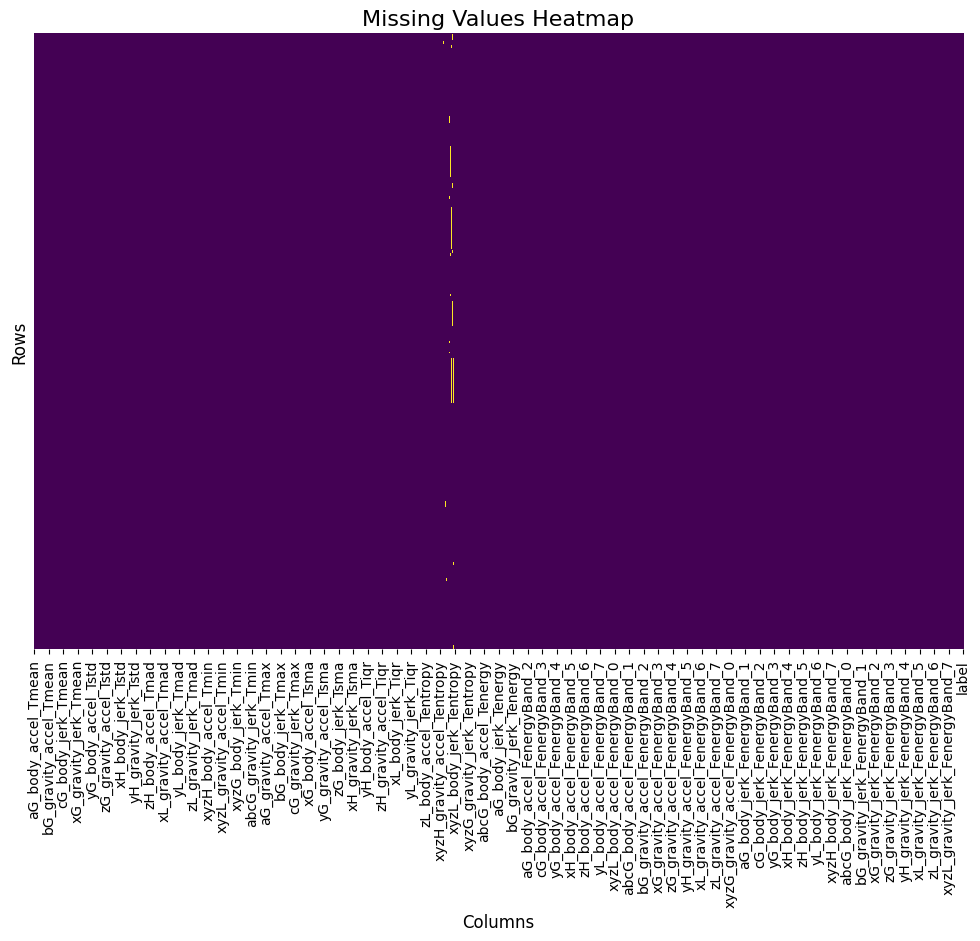

In [30]:
# Create a heatmap to visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df_00.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values Heatmap", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Rows", fontsize=12)
plt.show()

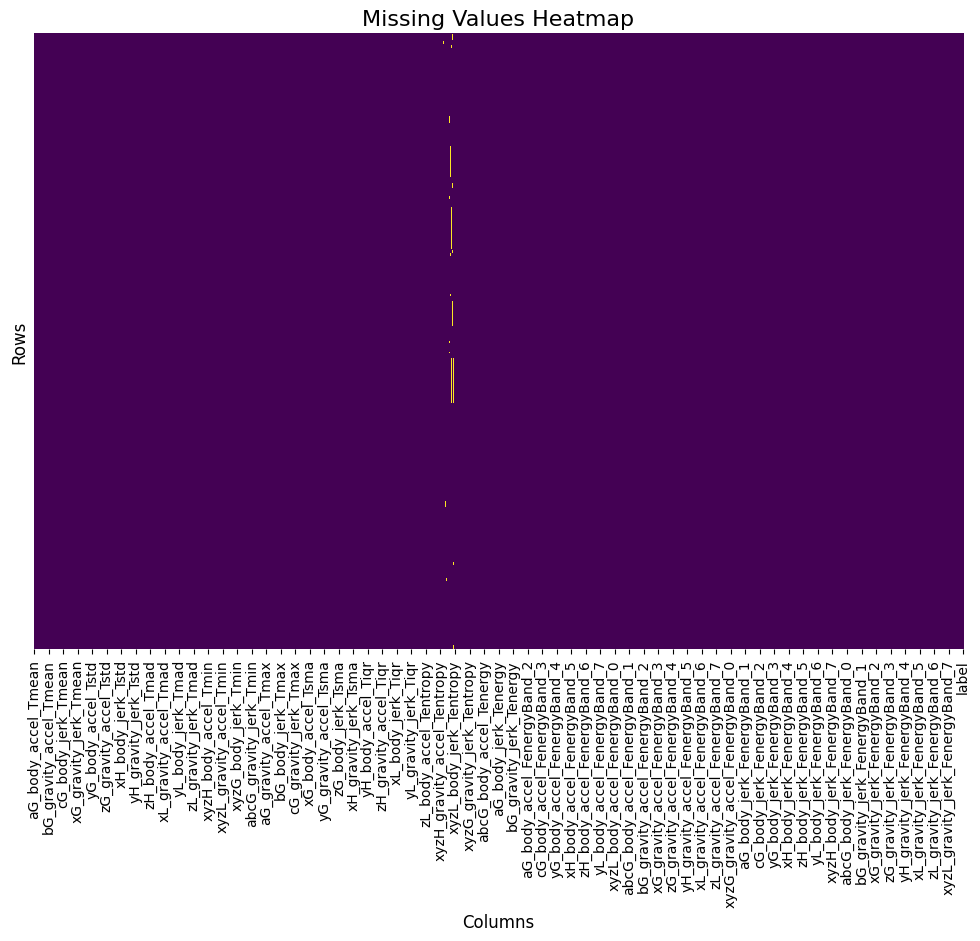

In [31]:
# Create a heatmap to visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df_30.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values Heatmap", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Rows", fontsize=12)
plt.show()

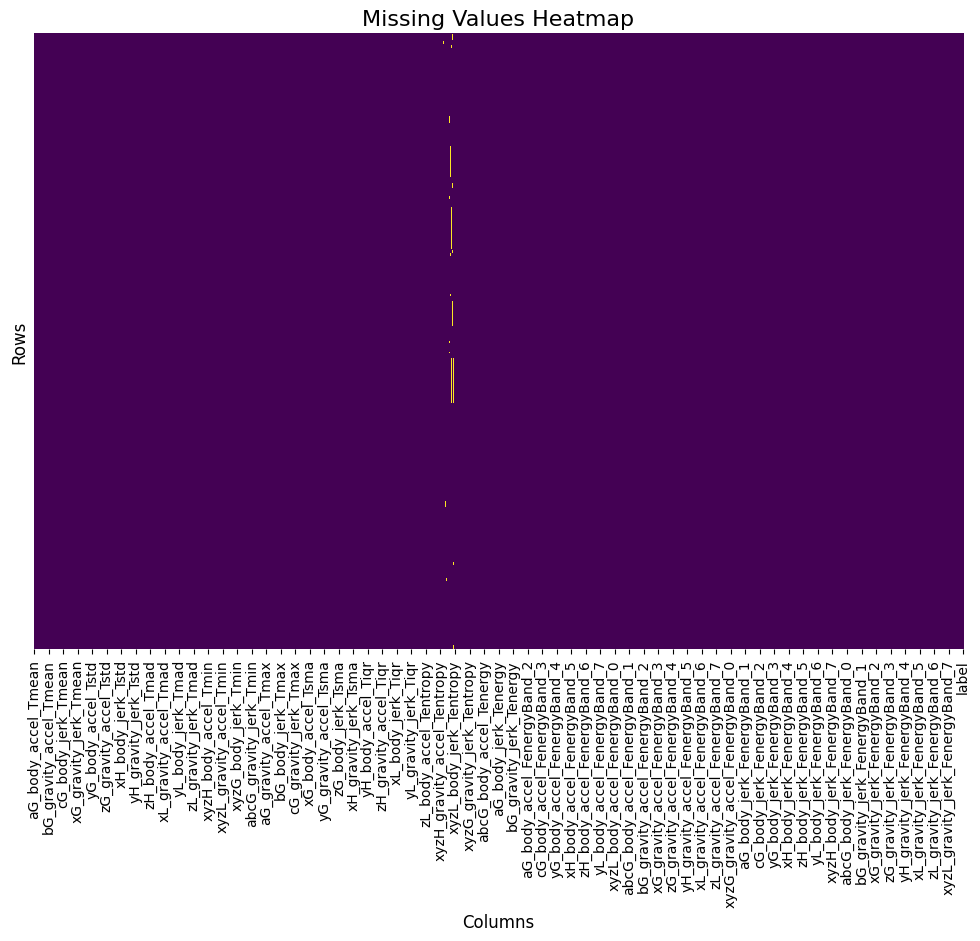

In [32]:
# Create a heatmap to visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df_60.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values Heatmap", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Rows", fontsize=12)
plt.show()

### check for columns that have missing values

In [44]:
# Check for columns with missing values
missing_values_per_column_00 = df_00.isnull().sum()
missing_values_per_column_30 = df_30.isnull().sum()
missing_values_per_column_60 = df_60.isnull().sum()

# Filter and display only columns with missing values
columns_with_missing_00 = missing_values_per_column_00[missing_values_per_column_00 > 0]
columns_with_missing_30 = missing_values_per_column_30[missing_values_per_column_30 > 0]
columns_with_missing_60 = missing_values_per_column_60[missing_values_per_column_60 > 0]


<Axes: >

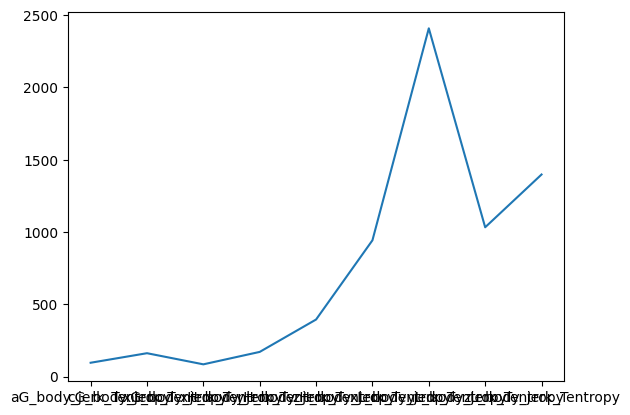

In [50]:
columns_with_missing_00.plot()

<Axes: >

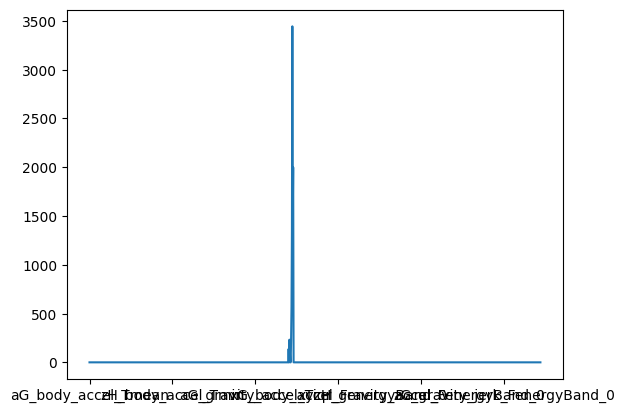

In [51]:
columns_with_missing_30.plot()

<Axes: >

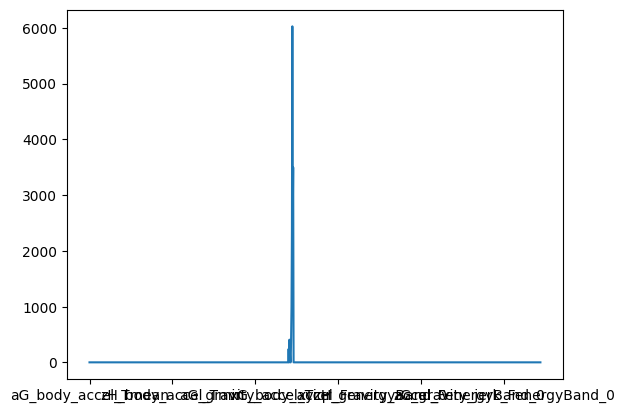

In [52]:
columns_with_missing_60.plot()

In [53]:
print(len(columns_with_missing_00))
print(len(columns_with_missing_30))
print(len(columns_with_missing_60))


9
1088
1088


In [39]:
len(columns_with_missing_00)

9

In [40]:
print(len(columns_with_missing_30))

1088


In [41]:
print(len(columns_with_missing_60))

1088


### check for rows that have missing values

In [59]:
# Count the number of missing values in each row
rows_with_missing_00 = df_00.isnull().sum(axis=1)

# Filter rows with missing values and display their count
rows_with_missing_counts_00 = rows_with_missing_00[rows_with_missing_00 > 0]
rows_with_missing_counts_00.value_counts()

,count
1,4280
2,1206


In [60]:
# Count the number of missing values in each row
rows_with_missing_30 = df_30.isnull().sum(axis=1)

# Filter rows with missing values and display their count
rows_with_missing_counts_30 = rows_with_missing_30[rows_with_missing_30 > 0]
rows_with_missing_counts_30.value_counts()

,count
1,6121
2,1723
1088,1


In [61]:
# Count the number of missing values in each row
rows_with_missing_60 = df_60.isnull().sum(axis=1)

# Filter rows with missing values and display their count
rows_with_missing_counts_60 = rows_with_missing_60[rows_with_missing_60 > 0]
rows_with_missing_counts_60.value_counts()

,count
1,10724
2,3014
1088,1


In [64]:
# Remove rows with more than 10 missing values
filtered_data_00 = df_00[rows_with_missing_00 <= 10]
filtered_data_30 = df_30[rows_with_missing_30 <= 10]
filtered_data_60 = df_60[rows_with_missing_60 <= 10]

# Display the shape of the filtered dataset
print(filtered_data_00.shape)
print(filtered_data_30.shape)
print(filtered_data_60.shape)

(16626, 1089)
(23749, 1089)
(41563, 1089)


In [70]:
# Remove columns with missing values
filtered_data_no_missing_cols_00 = filtered_data_00.dropna(axis=1)
filtered_data_no_missing_cols_30 = filtered_data_30.dropna(axis=1)
filtered_data_no_missing_cols_60 = filtered_data_60.dropna(axis=1)

# Display the shape of the filtered dataset
print(filtered_data_no_missing_cols_00.shape)
print(filtered_data_no_missing_cols_30.shape)
print(filtered_data_no_missing_cols_60.shape)

(16626, 1080)
(23749, 1080)
(41563, 1080)


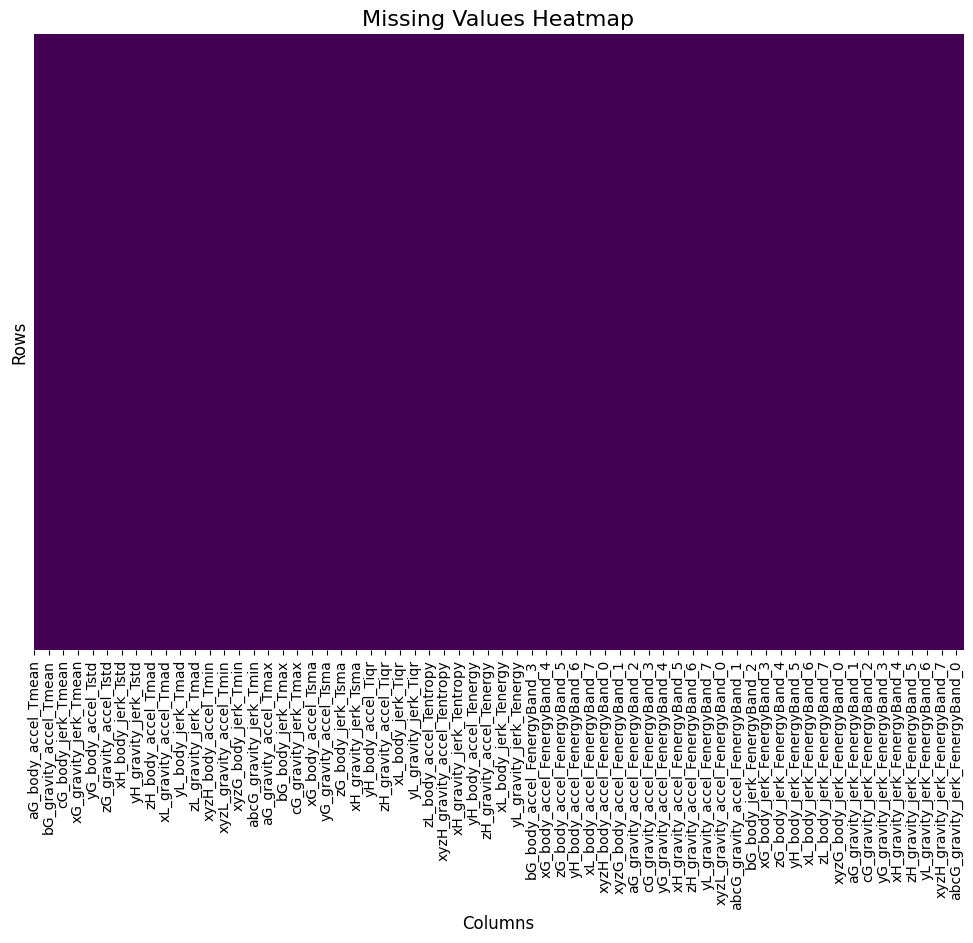

In [73]:
# Create a heatmap to visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_data_no_missing_cols_00.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values Heatmap", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Rows", fontsize=12)
plt.show()

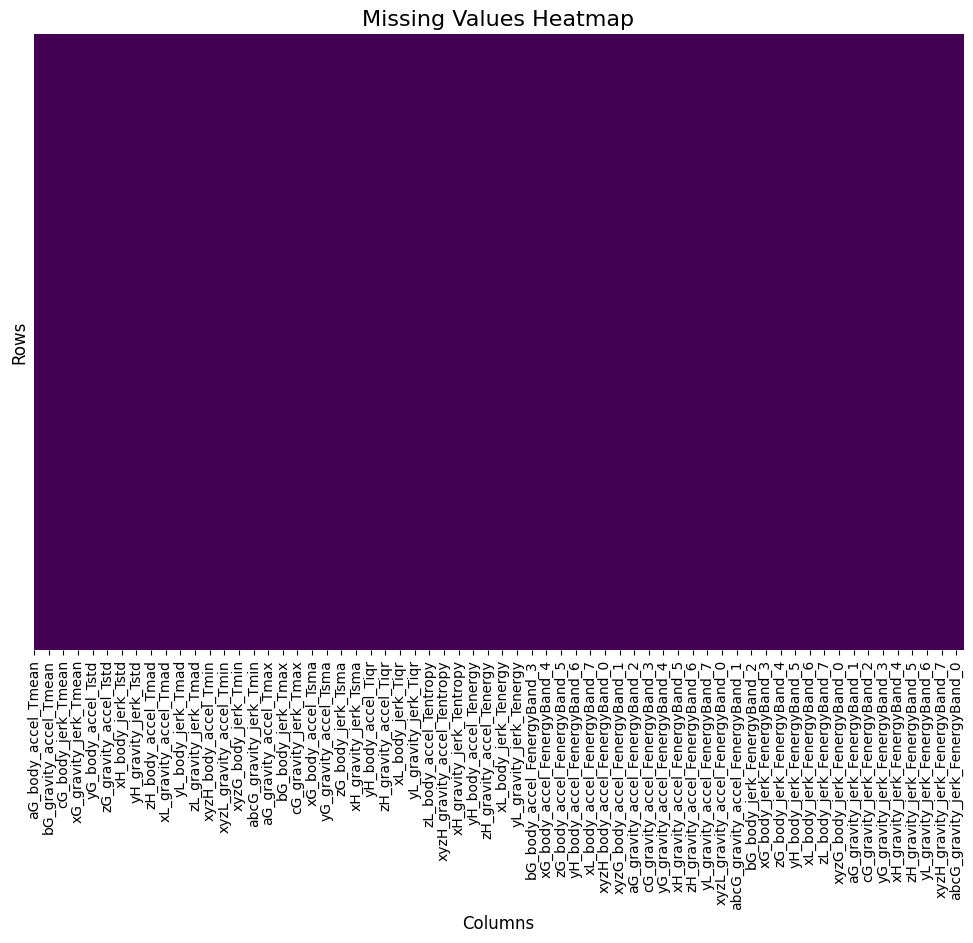

In [74]:
# Create a heatmap to visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_data_no_missing_cols_30.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values Heatmap", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Rows", fontsize=12)
plt.show()

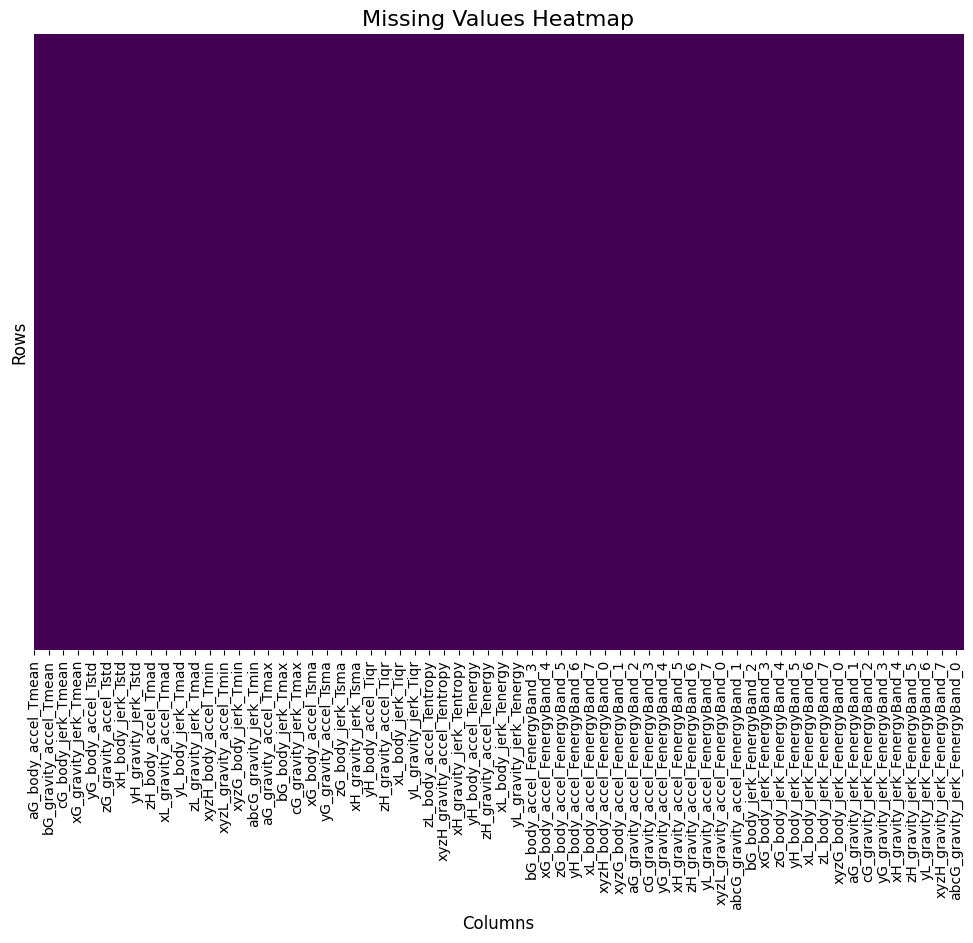

In [75]:
# Create a heatmap to visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_data_no_missing_cols_60.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values Heatmap", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Rows", fontsize=12)
plt.show()

### final check to see if there's still missing data

In [76]:
# Final check for missing values in the filtered dataset
remaining_missing_values_00 = filtered_data_no_missing_cols_00.isnull().sum().sum()
remaining_missing_values_30 = filtered_data_no_missing_cols_30.isnull().sum().sum()
remaining_missing_values_60 = filtered_data_no_missing_cols_60.isnull().sum().sum()
print(remaining_missing_values_00)
print(remaining_missing_values_30)
print(remaining_missing_values_60)

0
0
0


### final dataset shape check

In [77]:
print(filtered_data_no_missing_cols_00.shape)
print(filtered_data_no_missing_cols_30.shape)
print(filtered_data_no_missing_cols_60.shape)

(16626, 1080)
(23749, 1080)
(41563, 1080)


## Data types and basic statistics

In [79]:
# Data types and basic statistics
filtered_data_no_missing_cols_00.dtypes.value_counts()


,count
float64,1079
object,1


In [82]:
filtered_data_no_missing_cols_00.describe()

,aG_body_accel_Tmean,bG_body_accel_Tmean,cG_body_accel_Tmean,xG_body_accel_Tmean,yG_body_accel_Tmean,zG_body_accel_Tmean,xH_body_accel_Tmean,yH_body_accel_Tmean,zH_body_accel_Tmean,xL_body_accel_Tmean,...,xyzG_gravity_jerk_FenergyBand_6,xyzG_gravity_jerk_FenergyBand_7,abcG_gravity_jerk_FenergyBand_0,abcG_gravity_jerk_FenergyBand_1,abcG_gravity_jerk_FenergyBand_2,abcG_gravity_jerk_FenergyBand_3,abcG_gravity_jerk_FenergyBand_4,abcG_gravity_jerk_FenergyBand_5,abcG_gravity_jerk_FenergyBand_6,abcG_gravity_jerk_FenergyBand_7
count,16626.000000,16626.000000,16626.000000,16626.000000,16626.000000,16626.000000,16626.000000,16626.000000,16626.000000,16626.000000,...,1.662600e+04,1.662600e+04,1.662600e+04,1.662600e+04,1.662600e+04,1.662600e+04,1.662600e+04,1.662600e+04,1.662600e+04,1.662600e+04
mean,-734.390813,378.823647,-204.293683,986.098257,-1099.965896,-13215.022456,1880.204056,1880.928317,1861.665293,387.696234,...,8.281039e-02,6.293383e-02,9.133805e+01,9.046993e-01,3.150585e-01,1.704386e-01,1.142169e-01,8.789328e-02,7.510119e-02,5.707502e-02
std,111.916810,277.237642,406.945506,379.377722,344.765508,1569.600854,4.869833,4.676411,3.747421,284.419592,...,1.470039e+00,1.117193e+00,7.937265e+02,7.906421e+00,2.753395e+00,1.489517e+00,9.981780e-01,7.681276e-01,6.563334e-01,4.987970e-01
min,-1508.055955,-1189.072172,-5267.050697,-2739.076246,-2788.896164,-20775.738645,1847.328536,1871.072227,1847.238973,-2081.679091,...,7.030962e-22,0.000000e+00,4.405976e-17,6.547172e-21,4.486397e-22,1.969030e-22,5.395540e-23,1.795722e-23,6.594558e-24,0.000000e+00
25%,-735.133302,332.559388,-189.821315,807.734895,-1277.957075,-13768.147998,1877.547687,1877.475341,1859.550954,262.864344,...,8.750099e-16,6.647546e-16,1.145305e-14,8.133198e-17,2.830488e-17,1.531007e-17,1.025672e-17,7.895127e-18,6.746144e-18,5.127236e-18
50%,-723.139445,361.636139,-178.814300,1068.114781,-1161.717889,-13705.280524,1880.122364,1880.765905,1861.635391,454.435847,...,6.442532e-15,4.893115e-15,1.327262e-13,9.770347e-16,3.396183e-16,1.836984e-16,1.230630e-16,9.469779e-17,8.091296e-17,6.149344e-17
75%,-704.394206,393.714025,-158.327001,1213.085404,-1015.051697,-13531.665897,1882.017113,1883.130474,1863.780604,546.000000,...,2.083335e-06,1.583283e-06,4.854375e-04,3.555891e-06,1.228585e-06,6.646071e-07,4.431359e-07,3.409992e-07,2.913669e-07,2.214307e-07
max,-37.183265,2346.862921,5143.585701,2519.036774,1162.939159,-3860.933460,1905.788716,1898.791293,1871.916190,1341.378841,...,5.591650e+01,4.249515e+01,2.876564e+04,2.875248e+02,1.001301e+02,5.416789e+01,3.629982e+01,2.793379e+01,2.386828e+01,1.813929e+01


In [80]:
filtered_data_no_missing_cols_30.dtypes.value_counts()


,count
float64,1079
object,1


In [83]:
filtered_data_no_missing_cols_30.describe()

,aG_body_accel_Tmean,bG_body_accel_Tmean,cG_body_accel_Tmean,xG_body_accel_Tmean,yG_body_accel_Tmean,zG_body_accel_Tmean,xH_body_accel_Tmean,yH_body_accel_Tmean,zH_body_accel_Tmean,xL_body_accel_Tmean,...,xyzG_gravity_jerk_FenergyBand_6,xyzG_gravity_jerk_FenergyBand_7,abcG_gravity_jerk_FenergyBand_0,abcG_gravity_jerk_FenergyBand_1,abcG_gravity_jerk_FenergyBand_2,abcG_gravity_jerk_FenergyBand_3,abcG_gravity_jerk_FenergyBand_4,abcG_gravity_jerk_FenergyBand_5,abcG_gravity_jerk_FenergyBand_6,abcG_gravity_jerk_FenergyBand_7
count,23749.000000,23749.000000,23749.000000,23749.000000,23749.000000,23749.000000,23749.000000,23749.000000,23749.000000,23749.000000,...,2.374900e+04,2.374900e+04,2.374900e+04,2.374900e+04,2.374900e+04,2.374900e+04,2.374900e+04,2.374900e+04,2.374900e+04,2.374900e+04
mean,-734.404523,378.750030,-204.316837,985.993592,-1100.008972,-13215.068114,1880.204414,1880.927576,1861.665541,387.609578,...,8.281577e-02,6.293792e-02,9.134453e+01,9.047669e-01,3.150821e-01,1.704514e-01,1.142254e-01,8.789986e-02,7.510680e-02,5.707929e-02
std,111.960839,277.539334,406.877560,380.370401,344.498488,1569.917928,4.870506,4.677087,3.748161,284.889805,...,1.469642e+00,1.116892e+00,7.938100e+02,7.907307e+00,2.753703e+00,1.489684e+00,9.982898e-01,7.682137e-01,6.564070e-01,4.988529e-01
min,-1507.931591,-1188.815634,-5624.688295,-3031.322560,-3297.391148,-21238.676899,1847.592177,1871.091780,1847.188403,-2220.505040,...,8.422571e-22,1.006797e-22,2.669710e-17,5.624455e-21,6.711566e-22,1.620295e-22,6.861273e-23,1.773731e-23,9.019795e-24,9.024326e-25
25%,-735.057906,332.412096,-189.824322,806.778918,-1278.049511,-13768.426185,1877.541330,1877.467564,1859.549071,262.475068,...,9.022673e-16,6.859261e-16,1.156903e-14,8.301986e-17,2.893640e-17,1.564708e-17,1.048816e-17,8.067273e-18,6.896620e-18,5.241972e-18
50%,-723.132097,361.578137,-178.812340,1067.775196,-1161.736328,-13705.835451,1880.129775,1880.759688,1861.647273,454.139071,...,6.445814e-15,4.897848e-15,1.337227e-13,9.801227e-16,3.413686e-16,1.844040e-16,1.236864e-16,9.504920e-17,8.122007e-17,6.172427e-17
75%,-704.361788,393.475911,-158.269110,1213.262286,-1015.251218,-13532.057648,1882.011830,1883.138320,1863.778012,546.000000,...,1.961700e-06,1.490843e-06,4.929521e-04,3.610058e-06,1.235231e-06,6.681991e-07,4.477763e-07,3.445745e-07,2.944237e-07,2.237543e-07
max,136.238395,2342.942483,5143.585701,2783.062455,1163.403951,-3857.422642,1905.767859,1898.874856,1871.937810,1511.448799,...,5.796427e+01,4.405140e+01,3.113261e+04,3.108093e+02,1.082388e+02,5.855449e+01,3.923943e+01,3.019591e+01,2.580116e+01,1.960824e+01


In [81]:
filtered_data_no_missing_cols_60.dtypes.value_counts()


,count
float64,1079
object,1


In [84]:
filtered_data_no_missing_cols_60.describe()

,aG_body_accel_Tmean,bG_body_accel_Tmean,cG_body_accel_Tmean,xG_body_accel_Tmean,yG_body_accel_Tmean,zG_body_accel_Tmean,xH_body_accel_Tmean,yH_body_accel_Tmean,zH_body_accel_Tmean,xL_body_accel_Tmean,...,xyzG_gravity_jerk_FenergyBand_6,xyzG_gravity_jerk_FenergyBand_7,abcG_gravity_jerk_FenergyBand_0,abcG_gravity_jerk_FenergyBand_1,abcG_gravity_jerk_FenergyBand_2,abcG_gravity_jerk_FenergyBand_3,abcG_gravity_jerk_FenergyBand_4,abcG_gravity_jerk_FenergyBand_5,abcG_gravity_jerk_FenergyBand_6,abcG_gravity_jerk_FenergyBand_7
count,41563.000000,41563.000000,41563.000000,41563.000000,41563.000000,41563.000000,41563.000000,41563.000000,41563.000000,41563.000000,...,4.156300e+04,4.156300e+04,4.156300e+04,4.156300e+04,4.156300e+04,4.156300e+04,4.156300e+04,4.156300e+04,4.156300e+04,4.156300e+04
mean,-734.377742,378.773743,-204.279199,986.048213,-1099.932335,-13214.994760,1880.203277,1880.928261,1861.665863,387.650024,...,8.280936e-02,6.293304e-02,9.133528e+01,9.046766e-01,3.150506e-01,1.704343e-01,1.142140e-01,8.789108e-02,7.509930e-02,5.707359e-02
std,111.864090,277.356717,406.859696,379.313164,344.508270,1569.585538,4.870146,4.676747,3.747737,284.378364,...,1.469584e+00,1.116847e+00,7.937816e+02,7.907026e+00,2.753605e+00,1.489631e+00,9.982543e-01,7.681863e-01,6.563836e-01,4.988351e-01
min,-1508.433427,-1189.475113,-5624.688295,-2747.224728,-3384.915273,-20790.568494,1847.328536,1871.044823,1847.238973,-2086.910701,...,7.030962e-22,0.000000e+00,2.681067e-17,5.624455e-21,4.486397e-22,1.228125e-22,3.697459e-23,1.745768e-23,3.353275e-24,0.000000e+00
25%,-735.145408,332.691095,-189.828805,807.896529,-1277.823785,-13768.404472,1877.547675,1877.471715,1859.546565,263.275504,...,9.046917e-16,6.874400e-16,1.152801e-14,8.285487e-17,2.886901e-17,1.560572e-17,1.045574e-17,8.047096e-18,6.876658e-18,5.226191e-18
50%,-723.137674,361.595256,-178.824983,1067.526980,-1161.662631,-13705.474091,1880.125566,1880.759615,1861.646735,454.381288,...,6.397553e-15,4.861346e-15,1.332743e-13,9.885127e-16,3.440744e-16,1.861689e-16,1.247343e-16,9.599889e-17,8.201341e-17,6.232907e-17
75%,-704.253834,393.595514,-158.320306,1213.155906,-1015.302234,-13531.276572,1882.015269,1883.144216,1863.778691,546.000000,...,2.050000e-06,1.557139e-06,4.861690e-04,3.419937e-06,1.186284e-06,6.417501e-07,4.300594e-07,3.309436e-07,2.827776e-07,2.149040e-07
max,-35.428562,2352.754461,5141.474030,2791.307672,1166.853287,-3847.845679,1905.871437,1898.858133,1871.958869,1513.857737,...,6.053144e+01,4.600238e+01,3.253876e+04,3.251393e+02,1.132293e+02,6.125421e+01,4.104861e+01,3.158813e+01,2.699076e+01,2.051230e+01


## feature distribution samples

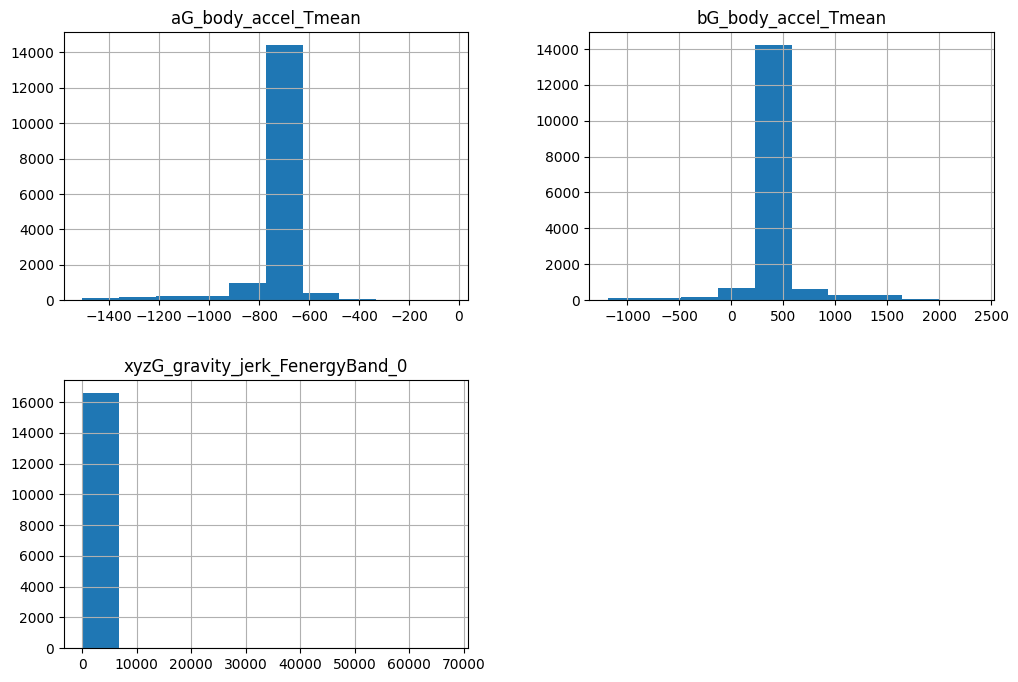

In [89]:
selected_features_00 = ['aG_body_accel_Tmean', 'bG_body_accel_Tmean', 'xyzG_gravity_jerk_FenergyBand_0']
filtered_data_no_missing_cols_00[selected_features_00].hist(figsize=(12, 8))
plt.show()

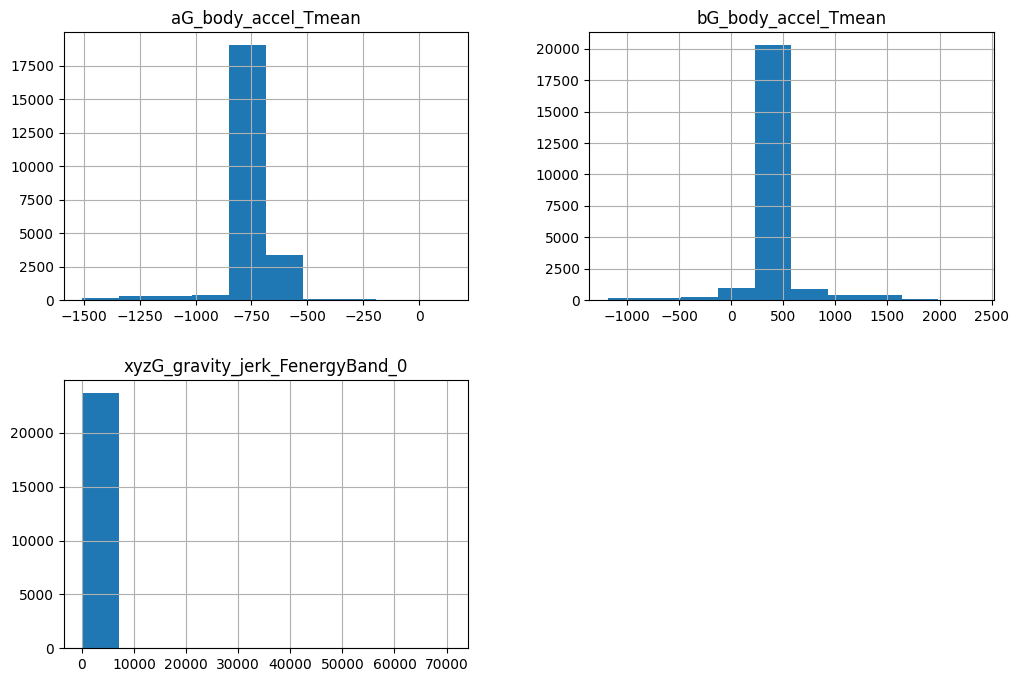

In [90]:
selected_features_30 = ['aG_body_accel_Tmean', 'bG_body_accel_Tmean', 'xyzG_gravity_jerk_FenergyBand_0']
filtered_data_no_missing_cols_30[selected_features_30].hist(figsize=(12, 8))
plt.show()

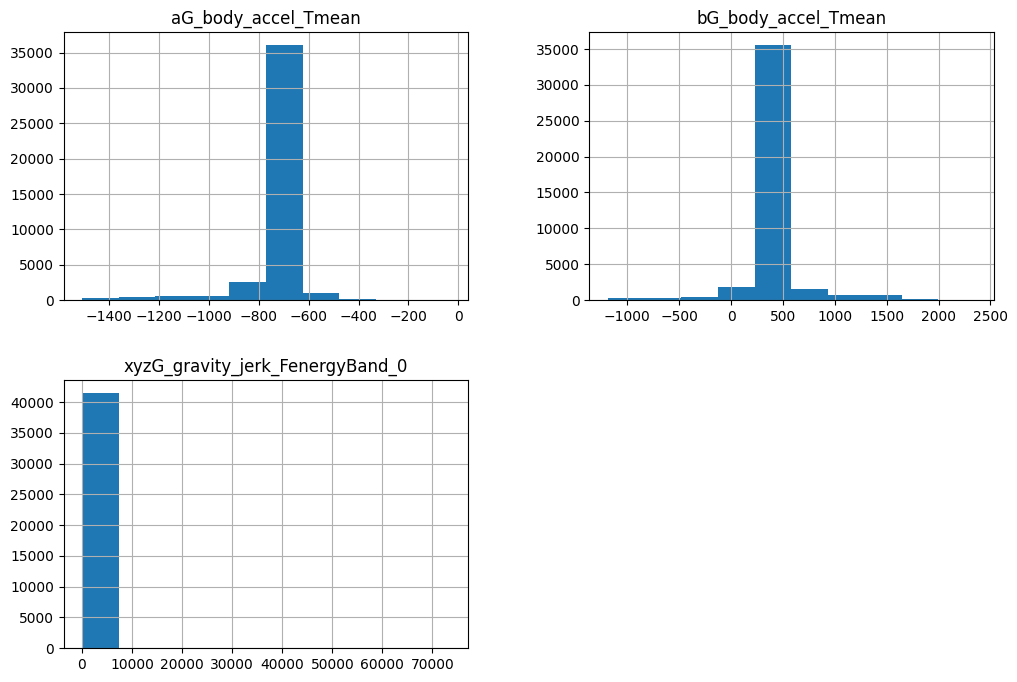

In [91]:
selected_features_60 = ['aG_body_accel_Tmean', 'bG_body_accel_Tmean', 'xyzG_gravity_jerk_FenergyBand_0']
filtered_data_no_missing_cols_60[selected_features_60].hist(figsize=(12, 8))
plt.show()

## feature correlation

<Axes: >

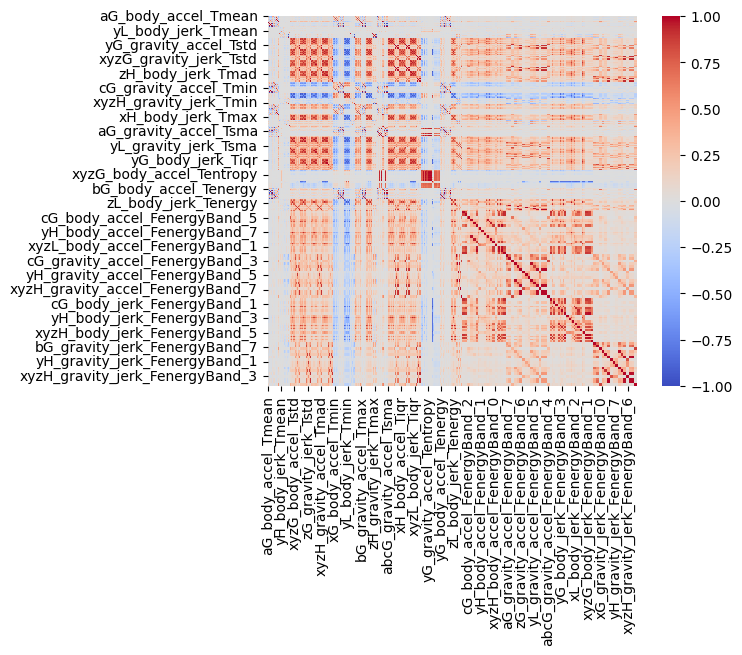

In [93]:
# calculate feature correlation
correlation_matrix_00 = filtered_data_no_missing_cols_00.select_dtypes(include=['number']).corr()

# visualization
import seaborn as sns
sns.heatmap(correlation_matrix_00, vmin=-1, vmax=1, cmap='coolwarm', square=True)

<Axes: >

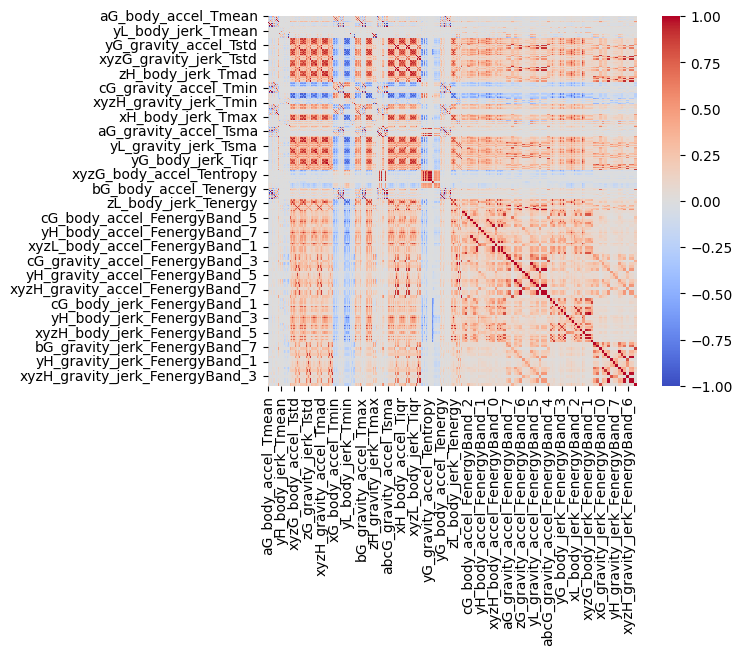

In [94]:
# calculate feature correlation
correlation_matrix_30 = filtered_data_no_missing_cols_30.select_dtypes(include=['number']).corr()

# visualization
import seaborn as sns
sns.heatmap(correlation_matrix_30, vmin=-1, vmax=1, cmap='coolwarm', square=True)

<Axes: >

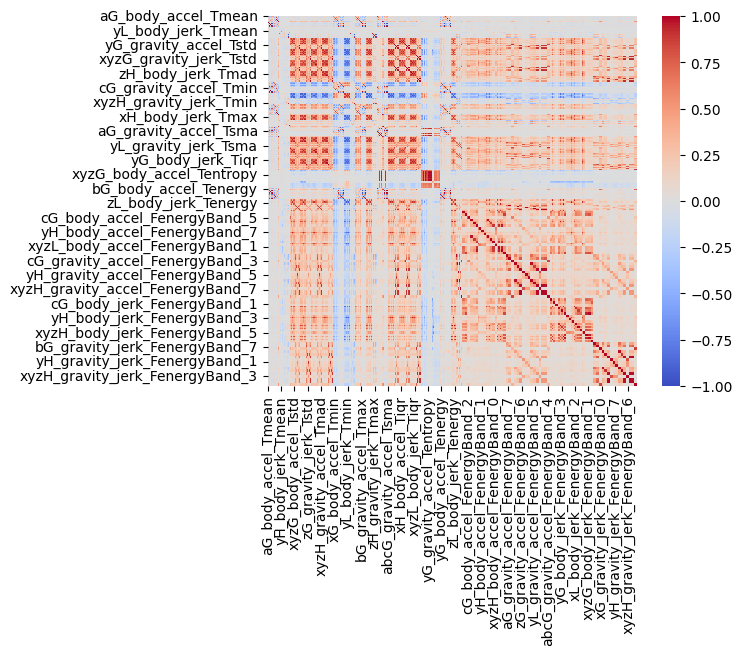

In [95]:
# calculate feature correlation
correlation_matrix_60 = filtered_data_no_missing_cols_60.select_dtypes(include=['number']).corr()

# visualization
import seaborn as sns
sns.heatmap(correlation_matrix_60, vmin=-1, vmax=1, cmap='coolwarm', square=True)

## Time and frequency domain feature analysis

In [96]:
# time domain
time_features_00 = [col for col in filtered_data_no_missing_cols_00.columns if 'T' in col]

# frequency domain
freq_features_00 = [col for col in filtered_data_no_missing_cols_00.columns if 'F' in col]

# Comparing Mean and Standard Deviation
time_stats_00 = filtered_data_no_missing_cols_00[time_features_00].describe().loc[['mean', 'std']]
freq_stats_00 = filtered_data_no_missing_cols_00[freq_features_00].describe().loc[['mean', 'std']]
print("Time domain feature statistics:\n", time_stats_00)
print("Frequency domain feature statistics:\n", freq_stats_00)

Time domain feature statistics:
       aG_body_accel_Tmean  bG_body_accel_Tmean  cG_body_accel_Tmean  \
mean          -734.390813           378.823647          -204.293683   
std            111.916810           277.237642           406.945506   

      xG_body_accel_Tmean  yG_body_accel_Tmean  zG_body_accel_Tmean  \
mean           986.098257         -1099.965896        -13215.022456   
std            379.377722           344.765508          1569.600854   

      xH_body_accel_Tmean  yH_body_accel_Tmean  zH_body_accel_Tmean  \
mean          1880.204056          1880.928317          1861.665293   
std              4.869833             4.676411             3.747421   

      xL_body_accel_Tmean  ...  xH_gravity_jerk_Tenergy  \
mean           387.696234  ...             6.531010e-07   
std            284.419592  ...             8.509834e-06   

      yH_gravity_jerk_Tenergy  zH_gravity_jerk_Tenergy  \
mean             4.051729e-07             3.131471e-07   
std              2.794026e-06  

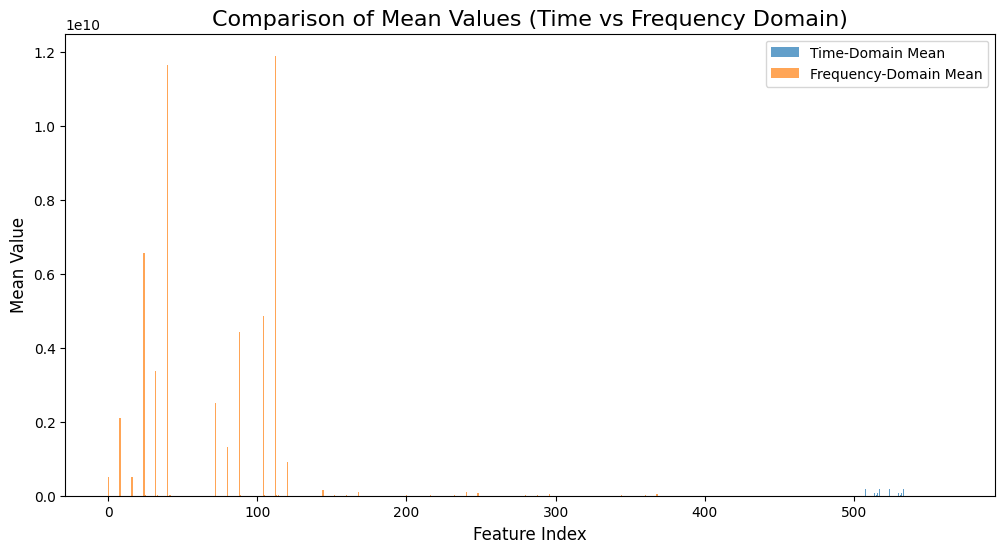

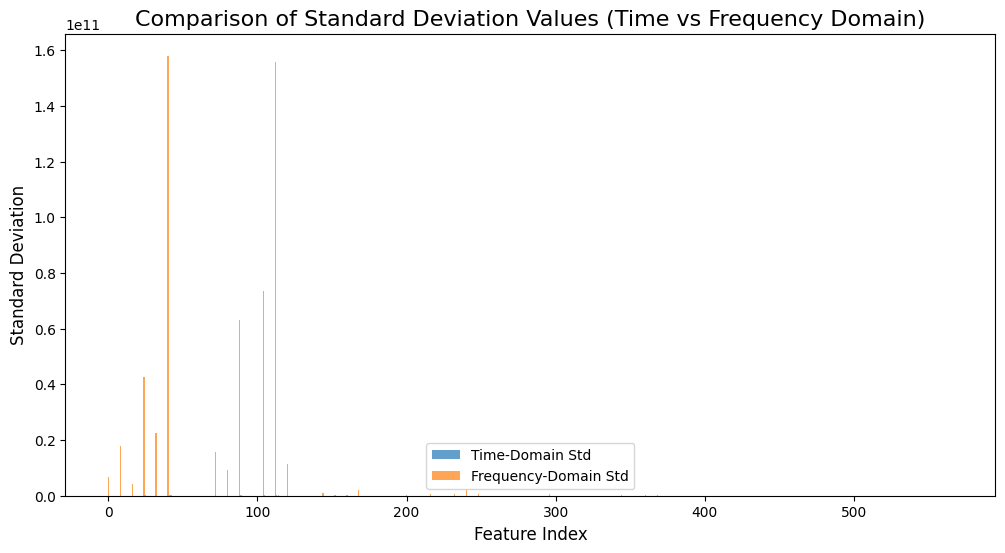

In [99]:
# Visualize the comparison of means and standard deviations
import matplotlib.pyplot as plt

# Mean comparison
plt.figure(figsize=(12, 6))
plt.bar(range(len(time_stats_00.loc['mean'])), time_stats_00.loc['mean'], alpha=0.7, label='Time-Domain Mean')
plt.bar(range(len(freq_stats_00.loc['mean'])), freq_stats_00.loc['mean'], alpha=0.7, label='Frequency-Domain Mean')
plt.title('Comparison of Mean Values (Time vs Frequency Domain)', fontsize=16)
plt.xlabel('Feature Index', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)
plt.legend()
plt.show()

# Standard deviation comparison
plt.figure(figsize=(12, 6))
plt.bar(range(len(time_stats_00.loc['std'])), time_stats_00.loc['std'], alpha=0.7, label='Time-Domain Std')
plt.bar(range(len(freq_stats_00.loc['std'])), freq_stats_00.loc['std'], alpha=0.7, label='Frequency-Domain Std')
plt.title('Comparison of Standard Deviation Values (Time vs Frequency Domain)', fontsize=16)
plt.xlabel('Feature Index', fontsize=12)
plt.ylabel('Standard Deviation', fontsize=12)
plt.legend()
plt.show()

In [97]:
# time domain
time_features_30 = [col for col in filtered_data_no_missing_cols_30.columns if 'T' in col]

# frequency domain
freq_features_30 = [col for col in filtered_data_no_missing_cols_30.columns if 'F' in col]

# Comparing Mean and Standard Deviation
time_stats_30 = filtered_data_no_missing_cols_30[time_features_30].describe().loc[['mean', 'std']]
freq_stats_30 = filtered_data_no_missing_cols_30[freq_features_30].describe().loc[['mean', 'std']]
print("Time domain feature statistics:\n", time_stats_30)
print("Frequency domain feature statistics:\n", freq_stats_30)

Time domain feature statistics:
       aG_body_accel_Tmean  bG_body_accel_Tmean  cG_body_accel_Tmean  \
mean          -734.404523           378.750030          -204.316837   
std            111.960839           277.539334           406.877560   

      xG_body_accel_Tmean  yG_body_accel_Tmean  zG_body_accel_Tmean  \
mean           985.993592         -1100.008972        -13215.068114   
std            380.370401           344.498488          1569.917928   

      xH_body_accel_Tmean  yH_body_accel_Tmean  zH_body_accel_Tmean  \
mean          1880.204414          1880.927576          1861.665541   
std              4.870506             4.677087             3.748161   

      xL_body_accel_Tmean  ...  xH_gravity_jerk_Tenergy  \
mean           387.609578  ...             6.463649e-07   
std            284.889805  ...             8.252678e-06   

      yH_gravity_jerk_Tenergy  zH_gravity_jerk_Tenergy  \
mean             4.040855e-07             3.116697e-07   
std              2.784843e-06  

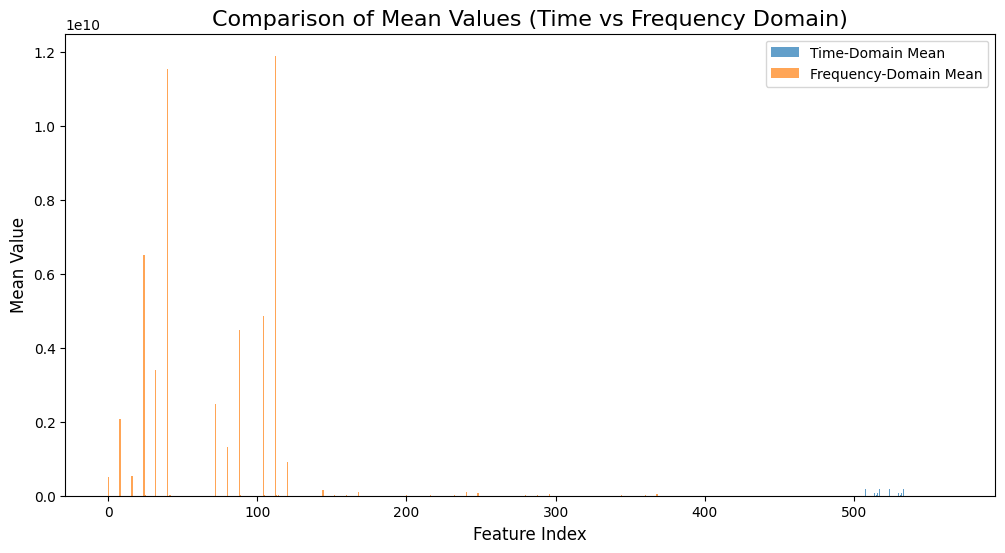

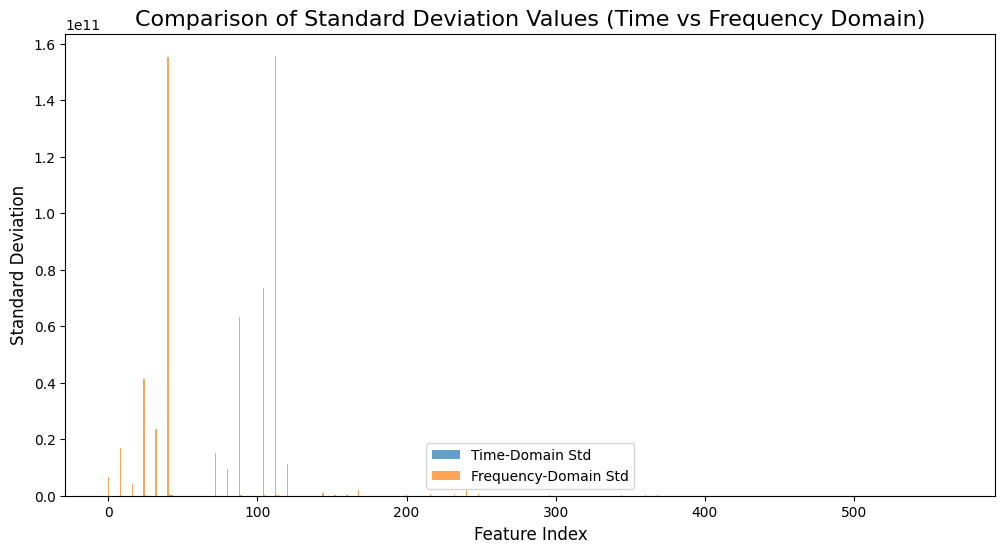

In [100]:
# Visualize the comparison of means and standard deviations
import matplotlib.pyplot as plt

# Mean comparison
plt.figure(figsize=(12, 6))
plt.bar(range(len(time_stats_30.loc['mean'])), time_stats_30.loc['mean'], alpha=0.7, label='Time-Domain Mean')
plt.bar(range(len(freq_stats_30.loc['mean'])), freq_stats_30.loc['mean'], alpha=0.7, label='Frequency-Domain Mean')
plt.title('Comparison of Mean Values (Time vs Frequency Domain)', fontsize=16)
plt.xlabel('Feature Index', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)
plt.legend()
plt.show()

# Standard deviation comparison
plt.figure(figsize=(12, 6))
plt.bar(range(len(time_stats_30.loc['std'])), time_stats_30.loc['std'], alpha=0.7, label='Time-Domain Std')
plt.bar(range(len(freq_stats_30.loc['std'])), freq_stats_30.loc['std'], alpha=0.7, label='Frequency-Domain Std')
plt.title('Comparison of Standard Deviation Values (Time vs Frequency Domain)', fontsize=16)
plt.xlabel('Feature Index', fontsize=12)
plt.ylabel('Standard Deviation', fontsize=12)
plt.legend()
plt.show()

In [98]:
# time domain
time_features_60 = [col for col in filtered_data_no_missing_cols_60.columns if 'T' in col]

# frequency domain
freq_features_60 = [col for col in filtered_data_no_missing_cols_60.columns if 'F' in col]

# Comparing Mean and Standard Deviation
time_stats_60 = filtered_data_no_missing_cols_60[time_features_60].describe().loc[['mean', 'std']]
freq_stats_60 = filtered_data_no_missing_cols_60[freq_features_60].describe().loc[['mean', 'std']]
print("Time domain feature statistics:\n", time_stats_60)
print("Frequency domain feature statistics:\n", freq_stats_60)

Time domain feature statistics:
       aG_body_accel_Tmean  bG_body_accel_Tmean  cG_body_accel_Tmean  \
mean          -734.377742           378.773743          -204.279199   
std            111.864090           277.356717           406.859696   

      xG_body_accel_Tmean  yG_body_accel_Tmean  zG_body_accel_Tmean  \
mean           986.048213         -1099.932335        -13214.994760   
std            379.313164           344.508270          1569.585538   

      xH_body_accel_Tmean  yH_body_accel_Tmean  zH_body_accel_Tmean  \
mean          1880.203277          1880.928261          1861.665863   
std              4.870146             4.676747             3.747737   

      xL_body_accel_Tmean  ...  xH_gravity_jerk_Tenergy  \
mean           387.650024  ...             6.398149e-07   
std            284.378364  ...             8.009843e-06   

      yH_gravity_jerk_Tenergy  zH_gravity_jerk_Tenergy  \
mean             4.029837e-07             3.102100e-07   
std              2.776205e-06  

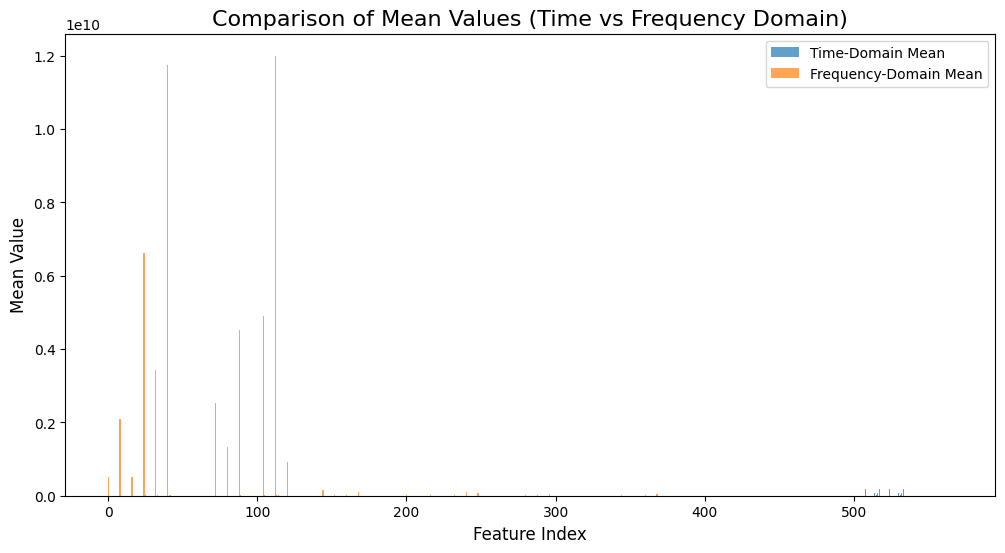

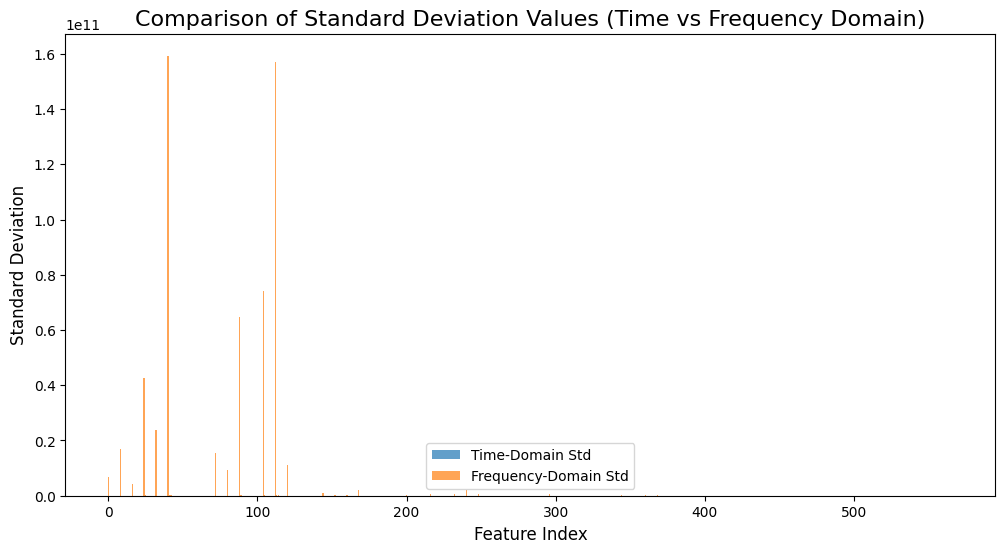

In [101]:
# Visualize the comparison of means and standard deviations
import matplotlib.pyplot as plt

# Mean comparison
plt.figure(figsize=(12, 6))
plt.bar(range(len(time_stats_60.loc['mean'])), time_stats_60.loc['mean'], alpha=0.7, label='Time-Domain Mean')
plt.bar(range(len(freq_stats_60.loc['mean'])), freq_stats_60.loc['mean'], alpha=0.7, label='Frequency-Domain Mean')
plt.title('Comparison of Mean Values (Time vs Frequency Domain)', fontsize=16)
plt.xlabel('Feature Index', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)
plt.legend()
plt.show()

# Standard deviation comparison
plt.figure(figsize=(12, 6))
plt.bar(range(len(time_stats_60.loc['std'])), time_stats_60.loc['std'], alpha=0.7, label='Time-Domain Std')
plt.bar(range(len(freq_stats_60.loc['std'])), freq_stats_60.loc['std'], alpha=0.7, label='Frequency-Domain Std')
plt.title('Comparison of Standard Deviation Values (Time vs Frequency Domain)', fontsize=16)
plt.xlabel('Feature Index', fontsize=12)
plt.ylabel('Standard Deviation', fontsize=12)
plt.legend()
plt.show()

## Use principal component analysis (PCA) to explore the contribution of feature dimensions to labels

<ipython-input-107-5f0e21cc6b48>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_no_missing_cols_00.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-107-5f0e21cc6b48>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_no_missing_cols_00.dropna(inplace=True)


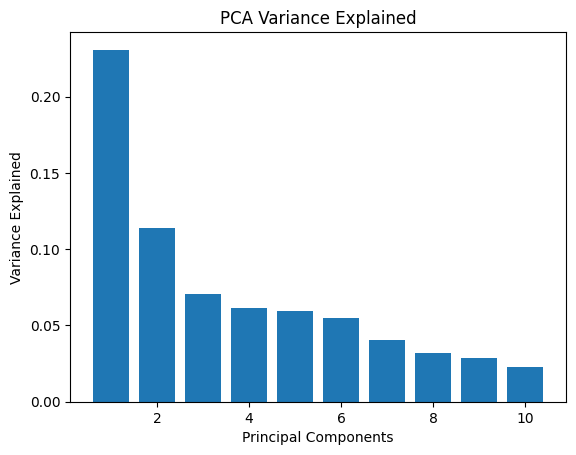

In [107]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Replace infinite values with NaN
filtered_data_no_missing_cols_00.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
filtered_data_no_missing_cols_00.dropna(inplace=True)

# Now you can proceed with scaling
scaler_00 = StandardScaler()
scaled_data_00 = scaler_00.fit_transform(filtered_data_no_missing_cols_00.drop(columns='label'))

# PCA降维
pca_00 = PCA(n_components=10)
pca_result_00 = pca_00.fit_transform(scaled_data_00)

# 可视化主成分贡献率
plt.bar(range(1, 11), pca_00.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('PCA Variance Explained')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Replace infinite values with NaN
filtered_data_no_missing_cols_30.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
filtered_data_no_missing_cols_30.dropna(inplace=True)

# Now you can proceed with scaling
scaler = StandardScaler()
scaled_data_30 = scaler.fit_transform(filtered_data_no_missing_cols_30.drop(columns='label'))

# PCA降维
pca = PCA(n_components=10)
pca_result = pca.fit_transform(scaled_data)

# 可视化主成分贡献率
plt.bar(range(1, 11), pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('PCA Variance Explained')
plt.show()


<ipython-input-108-685965071dcc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_no_missing_cols_30.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-108-685965071dcc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_no_missing_cols_30.dropna(inplace=True)


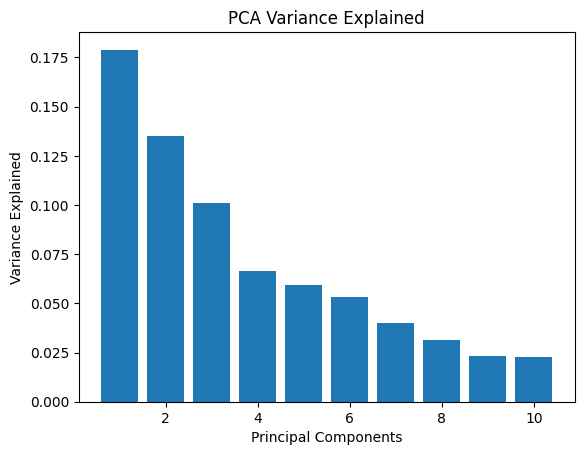

In [108]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Replace infinite values with NaN
filtered_data_no_missing_cols_30.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
filtered_data_no_missing_cols_30.dropna(inplace=True)

# Now you can proceed with scaling
scaler_30 = StandardScaler()
scaled_data_30 = scaler_00.fit_transform(filtered_data_no_missing_cols_30.drop(columns='label'))

# PCA降维
pca_30 = PCA(n_components=10)
pca_result_30 = pca_30.fit_transform(scaled_data_30)

# 可视化主成分贡献率
plt.bar(range(1, 11), pca_30.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('PCA Variance Explained')
plt.show()


<ipython-input-109-1668ed8deed2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_no_missing_cols_60.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-109-1668ed8deed2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_no_missing_cols_60.dropna(inplace=True)


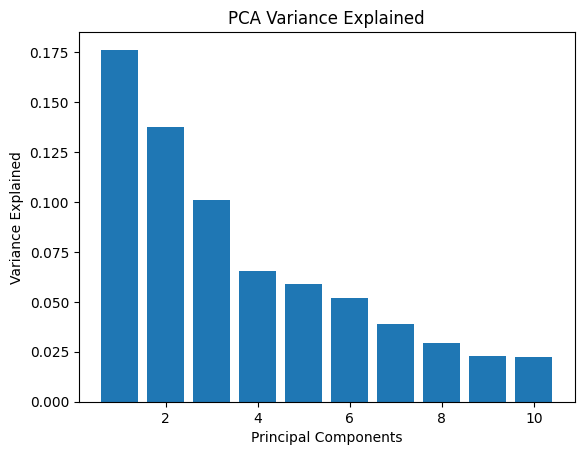

In [109]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Replace infinite values with NaN
filtered_data_no_missing_cols_60.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
filtered_data_no_missing_cols_60.dropna(inplace=True)

# Now you can proceed with scaling
scaler_60 = StandardScaler()
scaled_data_60 = scaler_60.fit_transform(filtered_data_no_missing_cols_60.drop(columns='label'))

# PCA降维
pca_60 = PCA(n_components=10)
pca_result_60 = pca_60.fit_transform(scaled_data_60)

# 可视化主成分贡献率
plt.bar(range(1, 11), pca_60.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('PCA Variance Explained')
plt.show()


## The relationship between labels and features

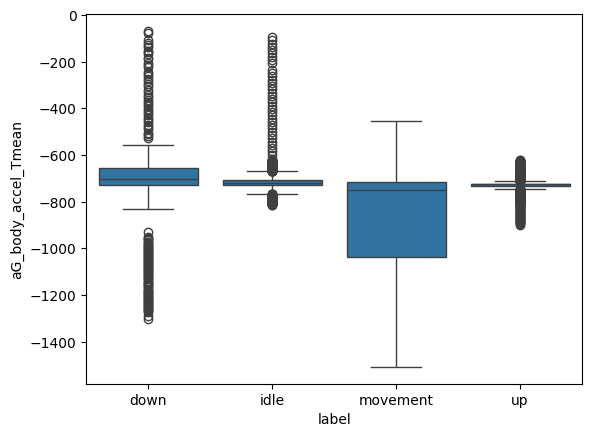

In [111]:
import seaborn as sns
# Group by label and count the mean of certain features
group_stats_00 = filtered_data_no_missing_cols_00.groupby('label')[['aG_body_accel_Tmean', 'bG_body_accel_Tmean']].mean()

# Plotting the distribution
sns.boxplot(x='label', y='aG_body_accel_Tmean', data=filtered_data_no_missing_cols_00)
plt.show()

<Axes: xlabel='label', ylabel='aG_body_accel_Tmean'>

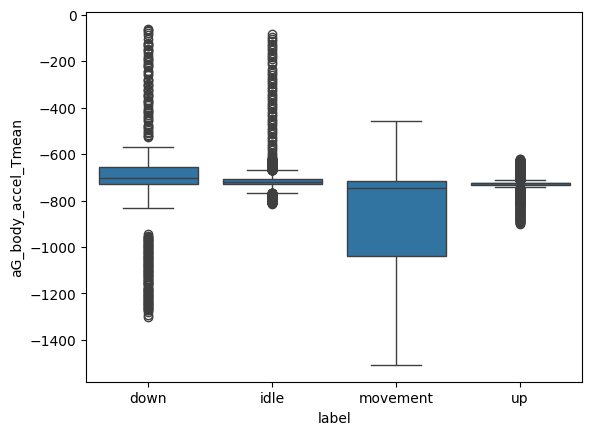

In [112]:
import seaborn as sns
# Group by label and count the mean of certain features
group_stats_30 = filtered_data_no_missing_cols_30.groupby('label')[['aG_body_accel_Tmean', 'bG_body_accel_Tmean']].mean()

# Plotting the distribution
sns.boxplot(x='label', y='aG_body_accel_Tmean', data=filtered_data_no_missing_cols_30)

<Axes: xlabel='label', ylabel='aG_body_accel_Tmean'>

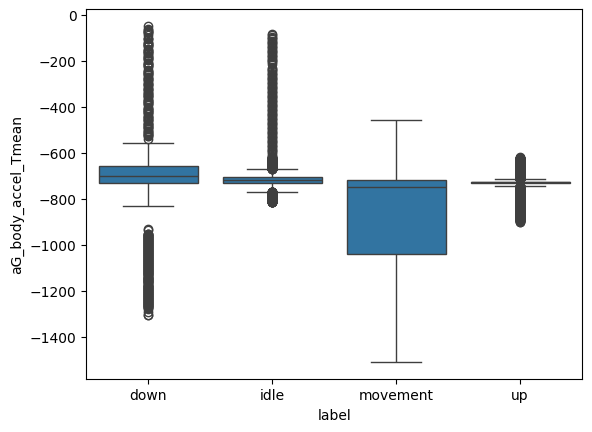

In [113]:
import seaborn as sns
# Group by label and count the mean of certain features
group_stats_60 = filtered_data_no_missing_cols_60.groupby('label')[['aG_body_accel_Tmean', 'bG_body_accel_Tmean']].mean()

# Plotting the distribution
sns.boxplot(x='label', y='aG_body_accel_Tmean', data=filtered_data_no_missing_cols_60)

# Save the data

In [114]:
filtered_data_no_missing_cols_00.to_csv('/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_00.csv', index=False)
filtered_data_no_missing_cols_30.to_csv('/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_30.csv', index=False)
filtered_data_no_missing_cols_60.to_csv('/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_60.csv', index=False)

In [115]:
print(filtered_data_no_missing_cols_00.shape)
print(filtered_data_no_missing_cols_30.shape)
print(filtered_data_no_missing_cols_60.shape)

(10141, 1080)
(14469, 1080)
(25360, 1080)
